In [1]:
# This dataset has been obtained from UCI ML Repository.
# https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

# The ‘Facebook Live Sellers in Thailand’ is a dataset present in UCI Machine Learning Datasets. The
# data includes 7050 observations and twelve attributes. The data is about the live selling attribute on
# the Facebook platform. Each record consists of details about the time live details of the sale are
# published to Facebook and engagements in the data. The engagements are regular Facebook
# dealings such as sharing and emoji rection.

In [2]:
# Business Problem:

# Live Shopping on Facebook is an interactive way to sell items, connect straight with viewers, and
# gain likely customers, all in real-time. When you sell products through Live Shopping on Facebook,
# you are live streaming as you feature and demonstrate your products. Small vendors can now reach
# a more expansive audience and connect with many clients. You need to implement K-Means
# clustering to find intrinsic batches within the dataset that depict the same status_type behavior. The
# status_type behavior variable consists of posts of a distinct nature (video, photos, statuses, and
# links).

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('Live.csv')
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
data.shape

(7050, 16)

In [6]:
data.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [7]:
data.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

In [8]:
data['Column1'].value_counts()

Series([], Name: Column1, dtype: int64)

In [9]:
data.drop(['Column1', 'Column2','Column3','Column4'],axis=1,inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [11]:
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [12]:
data['status_id'].value_counts()

819700534875473_957599447752247      2
819700534875473_972433889602136      2
819700534875473_981835315328660      2
819700534875473_980941638751361      2
819700534875473_978746665637525      2
                                    ..
246675545449582_264078163709320      1
246675545449582_264081010375702      1
246675545449582_264089710374832      1
246675545449582_264092513707885      1
1050855161656896_1050858841656528    1
Name: status_id, Length: 6997, dtype: int64

In [13]:
len(data['status_id'].unique())

6997

In [14]:
# No need to labels --> So, removing this column in a while

In [15]:
len(data['status_published'].unique())

6913

In [16]:
# The 'status_published' column is also not desirable. Lets drop them both.

In [17]:
data.drop(['status_id','status_published'],axis=1,inplace=True)

In [18]:
data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [19]:
data.columns

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')

In [20]:
df = data.copy()
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [22]:
# Lets first convert the object column into numeric by Label encoding:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df['status_type'] = le.fit_transform(df['status_type'])

In [23]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [24]:
# Lets apply standard scaler now directly to the copied Data --> df:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [25]:
df_scaled = sc.fit_transform(df)

In [26]:
df_scaled

array([[ 1.37428794,  0.64610394,  0.32335035, ...,  0.07671305,
         0.47357035, -0.15574803],
       [-0.74810636, -0.17319166, -0.25220622, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [ 1.37428794, -0.00673846,  0.01308938, ...,  0.07671305,
        -0.152587  , -0.15574803],
       ...,
       [-0.74810636, -0.49312768, -0.25220622, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [-0.74810636,  0.26131603, -0.23871662, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [-0.74810636, -0.46070173, -0.25220622, ..., -0.17600986,
        -0.152587  , -0.15574803]])

In [27]:
df.columns

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')

In [28]:
df_scaled = pd.DataFrame(df_scaled,columns=df.columns)
df_scaled.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.374288,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748
1,-0.748106,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
2,1.374288,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748
3,-0.748106,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
4,-0.748106,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748


In [29]:
# Now lets do the K-means clustering:

In [30]:
from sklearn.cluster import KMeans 

In [31]:
# For that first lets find out the required number of clusters we want to take:
# method 1: Elbow method (If this works well we will stop here or else we will try the Silhouette method)

# How many clusters do we want to make. At least lets get a range --> 2 to 8 (min we have to take 2 clusters)
clusters = range(2,9) # if we want to take 2 to 8 then we have to keep range till 9 since the last element is excluded

# This is our empty list to keep our WCSS(Within Cluster sum of squared distnces)
ssd = []

for x in clusters:
    km = KMeans(n_clusters=x, random_state=30)
    km.fit(df_scaled)
    ssd.append(km.inertia_)
    print(f'The WCSS for the model with {x} clusters is {km.inertia_}') 

The WCSS for the model with 2 clusters is 54852.32504547898
The WCSS for the model with 3 clusters is 44932.64722081609
The WCSS for the model with 4 clusters is 37975.70710438722
The WCSS for the model with 5 clusters is 32551.75331714954
The WCSS for the model with 6 clusters is 28762.933514994584
The WCSS for the model with 7 clusters is 25496.339060034436
The WCSS for the model with 8 clusters is 22597.29732988155


In [32]:
# Its not clear from the WCSS values although they are reducing well.

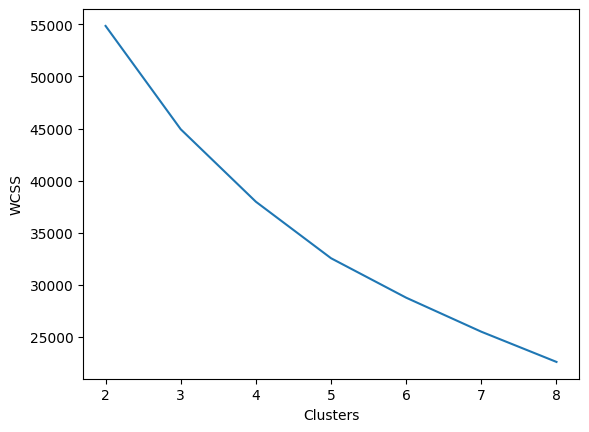

In [33]:
# Lets draw the Elbow curve and decide:
plt.plot(clusters,ssd)
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
# Not clear seems like either 3 or 4 or 5. Lets go ahead and use the Silhouette method as well:

In [35]:
from sklearn.metrics import silhouette_score

In [36]:
# Method 2: Silhouette method
# How many clusters do we want to make. At least lets get a range --> 2 to 8 (min we have to take 2 clusters)
clusters = range(2,9) # if we want to take 2 to 8 then we have to keep range till 9 since the last element is excluded

# This is our empty list to keep our silhouette score:
score_list = [] 

for x in clusters:
    km = KMeans(n_clusters=x, random_state=30)
    km.fit(df_scaled)
    cluster_labels = km.labels_
    score = silhouette_score(df_scaled,cluster_labels)
    score_list.append(score)
    print(f'The score of the model with {x} clusters is {score}') 

The score of the model with 2 clusters is 0.7524998608055273
The score of the model with 3 clusters is 0.6596344501214357
The score of the model with 4 clusters is 0.5762326866875663
The score of the model with 5 clusters is 0.5873370869352409
The score of the model with 6 clusters is 0.5912558252140044
The score of the model with 7 clusters is 0.5926470199725294
The score of the model with 8 clusters is 0.5938308013951108


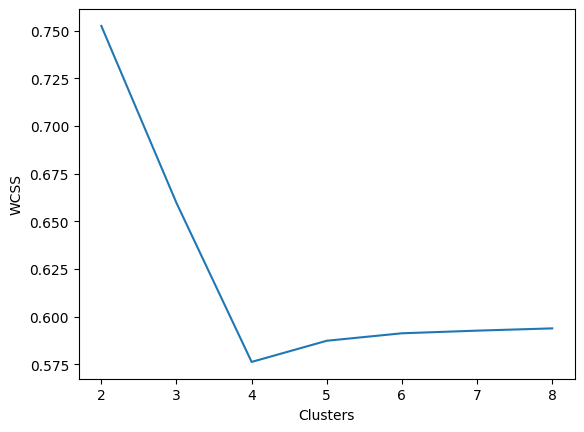

In [37]:
# but lets draw the plot and check:
plt.plot(clusters,score_list)
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [38]:
# So, now its clear. Lets take 4.

In [39]:
# in case of K-means clustering there is no splitting since its unsupervised and clustering is done within

In [40]:
# Now lets make our k-means model:
km = KMeans(n_clusters=4, random_state=30)
km.fit(df_scaled) 

KMeans(n_clusters=4, random_state=30)

In [41]:
km.labels_

array([0, 1, 0, ..., 1, 1, 1])

In [42]:
data1 = pd.read_csv('Live.csv')

In [43]:
data1['Assigned_cluster'] = km.labels_

In [44]:
data1.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4,Assigned_cluster
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN,1
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN,1
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN,1


In [45]:
data1.drop(['Column1', 'Column2','Column3','Column4'],axis=1,inplace=True)

In [46]:
data1.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Assigned_cluster
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,1
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,1
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,1


In [47]:
data1['Assigned_cluster'].value_counts()

1    4384
0    2089
3     375
2     202
Name: Assigned_cluster, dtype: int64

In [48]:
# Altough clustering has been applied on all the below columns but since human vision is confined to 2D we can only see
# data for 2 columns at a time. Off-course we can also see clusters based on 3 columns in 3D as well using some 3D plots but
# lets do it 2D as of now.
df.columns

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')

In [49]:
# Lets do the visualization:
# taking 2 random columns from the above:
x = df_scaled.iloc[:,[3,6]]
x

,num_shares,num_wows
0,1.686879,0.196196
1,-0.304144,-0.147879
2,0.129017,-0.033187
3,-0.304144,-0.147879
4,-0.304144,-0.147879
...,...,...
7045,-0.304144,-0.147879
7046,-0.304144,-0.147879
7047,-0.304144,-0.147879
7048,-0.136959,-0.147879


In [50]:
x_array = x.values
x_array

array([[ 1.6868788 ,  0.1961959 ],
       [-0.3041444 , -0.147879  ],
       [ 0.12901714, -0.03318737],
       ...,
       [-0.3041444 , -0.147879  ],
       [-0.13695924, -0.147879  ],
       [-0.3041444 , -0.147879  ]])

In [51]:
pred = km.fit_predict(x_array) 

In [52]:
pred

array([2, 0, 0, ..., 0, 0, 0])

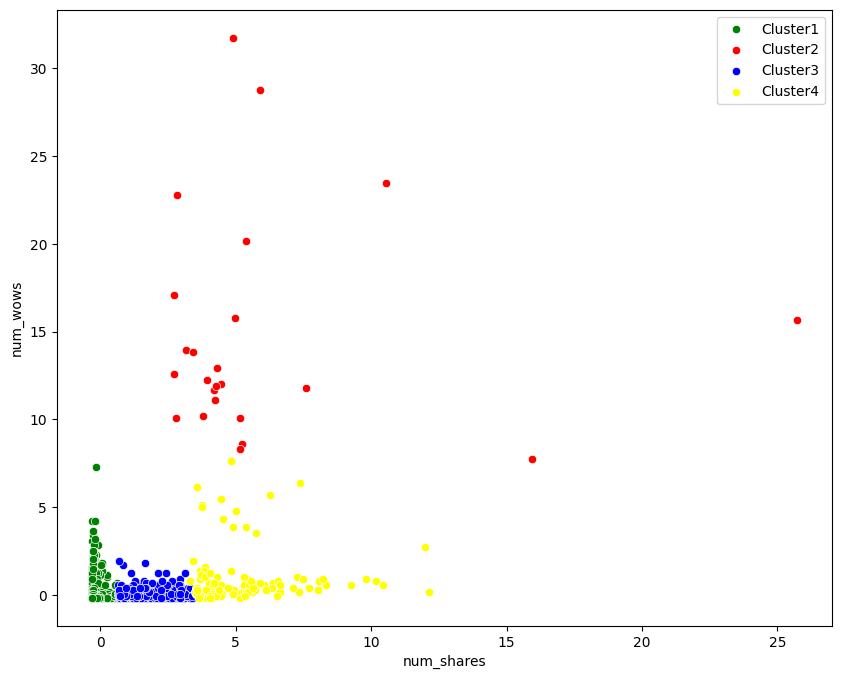

In [58]:
plt.figure(figsize = (10, 8))

sns.scatterplot(x = x_array[pred == 0, 0], y = x_array[pred == 0, 1] , color = 'green', label = 'Cluster1')
sns.scatterplot(x = x_array[pred == 1, 0], y = x_array[pred == 1, 1] , color = 'red', label = 'Cluster2')
sns.scatterplot(x = x_array[pred == 2, 0], y = x_array[pred == 2, 1] , color = 'blue', label = 'Cluster3')
sns.scatterplot(x = x_array[pred == 3, 0], y = x_array[pred == 3, 1] , color = 'yellow', label = 'Cluster4')

plt.xlabel('num_shares')
plt.ylabel('num_wows')

plt.show()

In [54]:
data1.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Assigned_cluster'],
      dtype='object')

In [55]:
cluster_2_data = data1.loc[data1['Assigned_cluster'] == 2]
cluster_2_data

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Assigned_cluster
99,246675545449582_1474958169287974,video,11/18/2017 1:23,1493,1979,753,1333,139,9,3,8,1,2
343,246675545449582_1229012967215830,video,3/18/2017 9:09,1379,769,69,1131,234,4,4,2,4,2
413,246675545449582_1170184399765354,video,1/14/2017 22:34,446,6148,120,352,80,7,5,0,2,2
480,246675545449582_1134207113363083,video,12/9/2016 21:48,452,19013,161,353,92,2,3,2,0,2
482,246675545449582_1133476640102797,video,12/9/2016 9:29,543,4661,178,397,136,2,6,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6861,1050855161656896_1375800062495736,video,8/23/2017 8:58,391,6407,174,340,36,4,9,2,0,2
6865,1050855161656896_1374921395916936,video,8/22/2017 8:01,426,4637,187,356,44,12,6,3,5,2
6873,1050855161656896_1373228209419588,video,8/20/2017 7:54,249,5995,189,219,21,1,1,6,1,2
6906,1050855161656896_1367128250029584,video,8/13/2017 10:47,407,4225,179,318,55,4,26,4,0,2


In [57]:
# Similarly we can visualize the clustering wrt the other columns as well and find out why a particular cluster is unique
# and interpret.
# Note that the clustering is the same but when we see it in accordance to selected columns they might visually look
# different in 2D. A clear picture can be drawn if we would have been able to see the whole cluster in a multi-dimension.